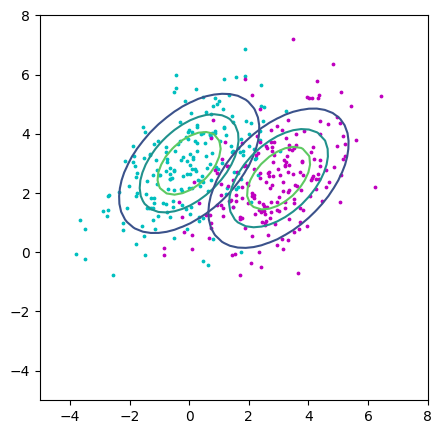

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 8, nx)
    y = np.linspace(-5, 8, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

NumDataPerClass = 200

m1 = [[0, 3]]
m2 = [[3, 2.5]]

C = [[2, 1], [1, 2]]

A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=3)
ax.scatter(X2[:,0], X2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

nx, ny = 50, 50
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C = np.array(C, np.float32)

Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C)
plt.contour(Xp1, Yp1, Zp1, 3)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C)
plt.contour(Xp2, Yp2, Zp2, 3)

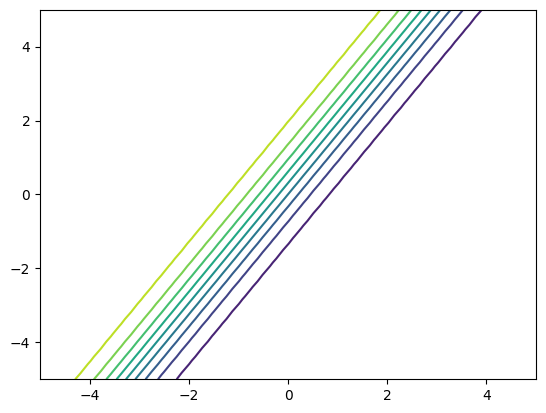

In [20]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z

nx, ny = 50, 50

C = np.array(C, np.float32)

P1 = 0.5
P2 = 0.5

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)
plt.contour(Xp, Yp, Zp, 10)


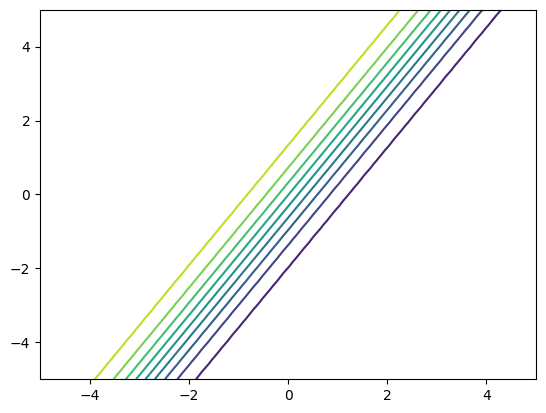

In [21]:
P1 = 0.7
P2 = 0.3

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)
plt.contour(Xp, Yp, Zp, 10)

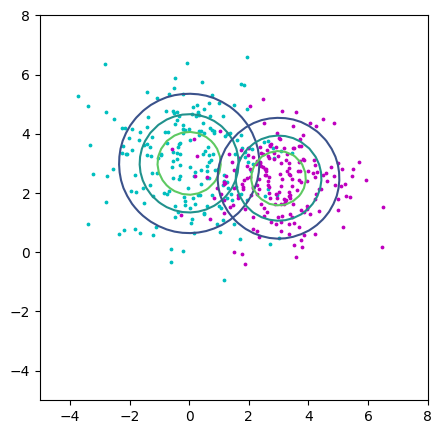

In [22]:
C1 = [[2, 0], [0, 2]]
C2 = [[1.5, 0], [0, 1.5]]

A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=3)
ax.scatter(X2[:,0], X2[:,1], c="m", s=3)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)

nx, ny = 50, 50
m1 = np.array([0,3])
C1 = np.array(C1, np.float32)
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 3)
m2 = np.array([3,2.5])
C2 = np.array(C2, np.float32)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 3)

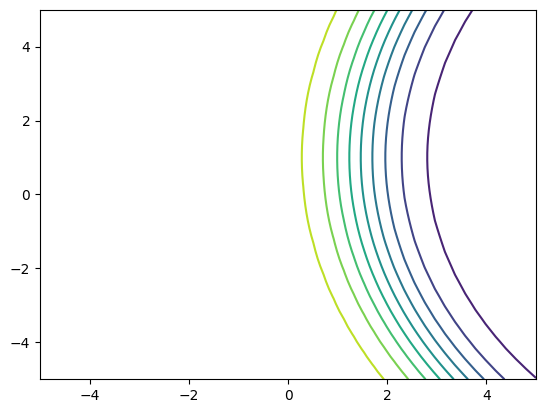

In [23]:
P1 = 0.5
P2 = 0.5

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 10)